In [1]:
!pip install openpyxl ssqueezepy pyts

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Model, Sequential
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
import keras.models
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [4]:
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

def load_activity_map():
    map = {}
    map[0] = 'transient'
    map[1] = 'lying'
    map[2] = 'sitting'
    map[3] = 'standing'
    map[4] = 'walking'
    map[5] = 'running'
    map[6] = 'cycling'
    map[7] = 'Nordic_walking'
    map[9] = 'watching_TV'
    map[10] = 'computer_work'
    map[11] = 'car driving'
    map[12] = 'ascending_stairs'
    map[13] = 'descending_stairs'
    map[16] = 'vacuum_cleaning'
    map[17] = 'ironing'
    map[18] = 'folding_laundry'
    map[19] = 'house_cleaning'
    map[20] = 'playing_soccer'
    map[24] = 'rope_jumping'
    return map

In [5]:
def generate_three_IMU(name):
    x = name +'_x'
    y = name +'_y'
    z = name +'_z'
    return [x,y,z]

def generate_four_IMU(name):
    x = name +'_x'
    y = name +'_y'
    z = name +'_z'
    w = name +'_w'
    return [x,y,z,w]

def generate_cols_IMU(name):
    # temp
    temp = name+'_temperature'
    output = [temp]
    # acceleration 16
    acceleration16 = name+'_3D_acceleration_16'
    acceleration16 = generate_three_IMU(acceleration16)
    output.extend(acceleration16)
    # acceleration 6
    acceleration6 = name+'_3D_acceleration_6'
    acceleration6 = generate_three_IMU(acceleration6)
    output.extend(acceleration6)
    # gyroscope
    gyroscope = name+'_3D_gyroscope'
    gyroscope = generate_three_IMU(gyroscope)
    output.extend(gyroscope)
    # magnometer
    magnometer = name+'_3D_magnetometer'
    magnometer = generate_three_IMU(magnometer)
    output.extend(magnometer)
    # oreintation
    oreintation = name+'_4D_orientation'
    oreintation = generate_four_IMU(oreintation)
    output.extend(oreintation)
    return output

def load_IMU():
    output = ['time_stamp','activity_id', 'heart_rate']
    hand = 'hand'
    hand = generate_cols_IMU(hand)
    output.extend(hand)
    chest = 'chest'
    chest = generate_cols_IMU(chest)
    output.extend(chest)
    ankle = 'ankle'
    ankle = generate_cols_IMU(ankle)
    output.extend(ankle)
    return output
    
def load_subjects(root='E:/AI/PAMAP2_Dataset/Protocol/subject'):
    output = pd.DataFrame()
    cols = load_IMU()
    
    for i in range(101,110):
        path = root + str(i) +'.dat'
        subject = pd.read_table(path, header=None, sep='\s+')
        subject.columns = cols 
        subject['id'] = i
        output = pd.concat([output, subject], ignore_index=True)
    output.reset_index(drop=True, inplace=True)
    return output

data = load_subjects()

In [6]:
data

,time_stamp,activity_id,heart_rate,hand_temperature,hand_3D_acceleration_16_x,hand_3D_acceleration_16_y,hand_3D_acceleration_16_z,hand_3D_acceleration_6_x,hand_3D_acceleration_6_y,hand_3D_acceleration_6_z,...,ankle_3D_gyroscope_y,ankle_3D_gyroscope_z,ankle_3D_magnetometer_x,ankle_3D_magnetometer_y,ankle_3D_magnetometer_z,ankle_4D_orientation_x,ankle_4D_orientation_y,ankle_4D_orientation_z,ankle_4D_orientation_w,id
0,8.38,0,104.0,30.0000,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,...,0.009250,-0.017580,-61.1888,-38.95990,-58.143800,1.000000,0.000000,0.000000,0.000000,101
1,8.39,0,NaN,30.0000,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,-0.004638,0.000368,-59.8479,-38.89190,-58.525300,1.000000,0.000000,0.000000,0.000000,101
2,8.40,0,NaN,30.0000,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.000148,0.022495,-60.7361,-39.41380,-58.399900,1.000000,0.000000,0.000000,0.000000,101
3,8.41,0,NaN,30.0000,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,-0.020301,0.011275,-60.4091,-38.76350,-58.395600,1.000000,0.000000,0.000000,0.000000,101
4,8.42,0,NaN,30.0000,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,-0.014303,-0.002823,-61.5199,-39.38790,-58.269400,1.000000,0.000000,0.000000,0.000000,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2872528,100.19,0,NaN,25.1875,-4.71493,10.22250,4.66893,-5.04654,9.94944,4.50736,...,-0.062676,-0.127084,-46.5153,3.58240,-0.035995,0.598531,0.033615,0.799791,-0.031075,109
2872529,100.20,0,NaN,25.1875,-4.95932,10.37130,4.12594,-4.96890,10.29620,4.43102,...,-0.027006,-0.089808,-45.7474,3.54453,0.108583,0.598428,0.033012,0.799933,-0.030018,109
2872530,100.21,0,NaN,25.1875,-4.93997,9.83615,3.70468,-5.04613,10.35690,4.14405,...,-0.038024,-0.064709,-46.3997,4.22078,0.105504,0.598233,0.033172,0.800095,-0.029416,109
2872531,100.22,0,NaN,25.1875,-4.64941,9.11129,3.51904,-5.06854,9.75268,3.87359,...,-0.025796,-0.064357,-46.5282,4.48593,0.530240,0.598116,0.033427,0.800180,-0.029208,109


In [7]:
data['activity_id'].value_counts()

activity_id
0     929661
4     238761
17    238690
1     192523
3     189931
7     188107
2     185188
16    175353
6     164600
12    117216
13    104944
5      98199
24     49360
Name: count, dtype: int64

In [8]:
def fix_data(data):
    data = data.drop(data[data['activity_id']==0].index)
    data = data.interpolate()
    # fill all the NaN values in a coulmn with the mean values of the column
    for colName in data.columns:
        data[colName] = data[colName].fillna(data[colName].mean())
    activity_mean = data.groupby(['activity_id']).mean().reset_index()
    return data

data = fix_data(data)

In [9]:
data.describe()

,time_stamp,activity_id,heart_rate,hand_temperature,hand_3D_acceleration_16_x,hand_3D_acceleration_16_y,hand_3D_acceleration_16_z,hand_3D_acceleration_6_x,hand_3D_acceleration_6_y,hand_3D_acceleration_6_z,...,ankle_3D_gyroscope_y,ankle_3D_gyroscope_z,ankle_3D_magnetometer_x,ankle_3D_magnetometer_y,ankle_3D_magnetometer_z,ankle_4D_orientation_x,ankle_4D_orientation_y,ankle_4D_orientation_z,ankle_4D_orientation_w,id
count,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,...,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06
mean,1.705202e+03,8.081830e+00,1.074879e+02,3.275126e+01,-4.952973e+00,3.585079e+00,3.602232e+00,-4.886286e+00,3.573597e+00,3.786931e+00,...,-3.652767e-02,6.658552e-03,-3.158971e+01,1.396960e+00,1.725039e+01,3.812299e-01,-8.998437e-03,3.023855e-01,-5.698127e-02,1.045664e+02
std,1.093463e+03,6.174789e+00,2.699215e+01,1.794162e+00,6.239663e+00,6.893705e+00,3.956957e+00,6.245972e+00,6.589666e+00,3.942860e+00,...,6.383285e-01,2.012898e+00,1.834639e+01,2.168678e+01,1.970652e+01,3.036803e-01,5.714335e-01,3.326730e-01,4.800388e-01,2.333052e+00
min,3.120000e+01,1.000000e+00,5.700000e+01,2.487500e+01,-1.453670e+02,-1.043010e+02,-1.014520e+02,-6.121470e+01,-6.184170e+01,-6.193470e+01,...,-1.812690e+01,-1.401960e+01,-1.728650e+02,-1.379080e+02,-1.027160e+02,1.521280e-06,-9.568760e-01,-8.768380e-01,-9.972810e-01,1.010000e+02
25%,7.445400e+02,3.000000e+00,8.600000e+01,3.168750e+01,-8.969760e+00,1.058210e+00,1.161470e+00,-8.866490e+00,1.057690e+00,1.363370e+00,...,-1.066082e-01,-4.416998e-01,-4.171632e+01,-1.248465e+01,3.794668e+00,1.426340e-01,-6.129580e-01,4.914657e-03,-5.378710e-01,1.020000e+02
50%,1.480330e+03,6.000000e+00,1.040000e+02,3.312500e+01,-5.450280e+00,3.526550e+00,3.431410e+00,-5.378515e+00,3.567850e+00,3.662640e+00,...,-3.950165e-03,-2.327570e-03,-3.400820e+01,7.769370e-01,1.876755e+01,2.838390e-01,0.000000e+00,3.055330e-01,0.000000e+00,1.050000e+02
75%,2.663610e+03,1.300000e+01,1.240000e+02,3.406250e+01,-9.577087e-01,6.453505e+00,6.531523e+00,-9.058870e-01,6.458670e+00,6.775980e+00,...,1.162570e-01,9.181807e-02,-1.790600e+01,1.783892e+01,3.121160e+01,5.600202e-01,6.153723e-01,5.960633e-01,4.382870e-01,1.070000e+02
max,4.245680e+03,2.400000e+01,2.020000e+02,3.550000e+01,6.285960e+01,1.556990e+02,1.577600e+02,5.282140e+01,6.225980e+01,6.192340e+01,...,1.358820e+01,1.652880e+01,9.155160e+01,9.424780e+01,1.469000e+02,1.000000e+00,9.595380e-01,9.514820e-01,9.961050e-01,1.090000e+02


In [10]:
data

,time_stamp,activity_id,heart_rate,hand_temperature,hand_3D_acceleration_16_x,hand_3D_acceleration_16_y,hand_3D_acceleration_16_z,hand_3D_acceleration_6_x,hand_3D_acceleration_6_y,hand_3D_acceleration_6_z,...,ankle_3D_gyroscope_y,ankle_3D_gyroscope_z,ankle_3D_magnetometer_x,ankle_3D_magnetometer_y,ankle_3D_magnetometer_z,ankle_4D_orientation_x,ankle_4D_orientation_y,ankle_4D_orientation_z,ankle_4D_orientation_w,id
2928,37.66,1,107.487925,30.375,2.21530,8.27915,5.58753,2.24689,8.55387,5.77143,...,-0.027714,0.001752,-61.1081,-36.863600,-58.369600,1.000000,0.000000,0.000000,0.000000,101
2929,37.67,1,107.487925,30.375,2.29196,7.67288,5.74467,2.27373,8.14592,5.78739,...,0.000945,0.006007,-60.8916,-36.319700,-58.365600,1.000000,0.000000,0.000000,0.000000,101
2930,37.68,1,107.487925,30.375,2.29090,7.14240,5.82342,2.26966,7.66268,5.78846,...,-0.052422,-0.004882,-60.3407,-35.784200,-58.611900,1.000000,0.000000,0.000000,0.000000,101
2931,37.69,1,107.487925,30.375,2.21800,7.14365,5.89930,2.22177,7.25535,5.88000,...,-0.018844,0.026950,-60.7646,-37.102800,-57.879900,1.000000,0.000000,0.000000,0.000000,101
2932,37.70,1,100.000000,30.375,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,...,-0.048878,-0.006328,-60.2040,-37.122500,-57.884700,1.000000,0.000000,0.000000,0.000000,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2872015,95.06,24,162.000000,25.125,4.99466,6.01881,5.59830,4.90787,6.05780,5.68357,...,-0.012885,0.005878,-45.7855,-0.831734,-0.170139,0.522929,-0.291612,0.705786,-0.378648,109
2872016,95.07,24,162.000000,25.125,5.02764,5.90369,5.48372,4.89090,5.95209,5.56301,...,0.003629,-0.004235,-46.0331,-0.817288,0.538134,0.522880,-0.291694,0.705895,-0.378450,109
2872017,95.08,24,162.000000,25.125,5.06409,5.71370,5.48491,4.97981,5.87584,5.45738,...,-0.035176,-0.002309,-45.5140,-1.229410,0.540438,0.522625,-0.291978,0.706161,-0.378084,109
2872018,95.09,24,162.000000,25.125,5.13914,5.63724,5.48629,4.97690,5.69448,5.29167,...,-0.036457,-0.007076,-45.9093,-0.565555,0.680109,0.522536,-0.291955,0.706426,-0.377733,109


In [11]:
data.isnull().sum()

time_stamp                    0
activity_id                   0
heart_rate                    0
hand_temperature              0
hand_3D_acceleration_16_x     0
hand_3D_acceleration_16_y     0
hand_3D_acceleration_16_z     0
hand_3D_acceleration_6_x      0
hand_3D_acceleration_6_y      0
hand_3D_acceleration_6_z      0
hand_3D_gyroscope_x           0
hand_3D_gyroscope_y           0
hand_3D_gyroscope_z           0
hand_3D_magnetometer_x        0
hand_3D_magnetometer_y        0
hand_3D_magnetometer_z        0
hand_4D_orientation_x         0
hand_4D_orientation_y         0
hand_4D_orientation_z         0
hand_4D_orientation_w         0
chest_temperature             0
chest_3D_acceleration_16_x    0
chest_3D_acceleration_16_y    0
chest_3D_acceleration_16_z    0
chest_3D_acceleration_6_x     0
chest_3D_acceleration_6_y     0
chest_3D_acceleration_6_z     0
chest_3D_gyroscope_x          0
chest_3D_gyroscope_y          0
chest_3D_gyroscope_z          0
chest_3D_magnetometer_x       0
chest_3D

In [12]:
print('Size of the data: ', data.size)
print('Shape of the data: ', data.shape)
print('Number of columns in the data: ', len(data.columns))
result_id = data.groupby(['id']).mean().reset_index()
print('Number of uniqe ids in the data: ', len(result_id))
result_act = data.groupby(['activity_id']).mean().reset_index()
print('Numbe of uniqe activitys in the data: ',len(result_act))

Size of the data:  106857960
Shape of the data:  (1942872, 55)
Number of columns in the data:  55
Number of uniqe ids in the data:  9
Numbe of uniqe activitys in the data:  12


In [13]:
data['activity_id'].value_counts()

activity_id
4     238761
17    238690
1     192523
3     189931
7     188107
2     185188
16    175353
6     164600
12    117216
13    104944
5      98199
24     49360
Name: count, dtype: int64

- 0 : 'transient'
- 1 : 'lying'
- 2 : 'sitting'
- 3 : 'standing'
- 4 : 'walking'
- 5 : 'running'
- 6 : 'cycling'
- 7 : 'Nordic_walking'
- 9 : 'watching_TV'
- 10 : 'computer_work'
- 11 : 'car driving'
- 12 : 'ascending_stairs'
- 13 : 'descending_stairs'
- 16 : 'vacuum_cleaning'
- 17 : 'ironing'
- 18 : 'folding_laundry'
- 19 : 'house_cleaning'
- 20 : 'playing_soccer'
- 24 : 'rope_jumping'


In [14]:
df_activity_1 = data[data['activity_id'] == 1]
df_activity_2 = data[data['activity_id'] == 2]
df_activity_3 = data[data['activity_id'] == 3]


In [15]:
df = pd.concat([df_activity_1, df_activity_2, df_activity_3])
df

,time_stamp,activity_id,heart_rate,hand_temperature,hand_3D_acceleration_16_x,hand_3D_acceleration_16_y,hand_3D_acceleration_16_z,hand_3D_acceleration_6_x,hand_3D_acceleration_6_y,hand_3D_acceleration_6_z,...,ankle_3D_gyroscope_y,ankle_3D_gyroscope_z,ankle_3D_magnetometer_x,ankle_3D_magnetometer_y,ankle_3D_magnetometer_z,ankle_4D_orientation_x,ankle_4D_orientation_y,ankle_4D_orientation_z,ankle_4D_orientation_w,id
2928,37.66,1,107.487925,30.3750,2.21530,8.27915,5.58753,2.24689,8.55387,5.77143,...,-0.027714,0.001752,-61.1081,-36.86360,-58.3696,1.000000,0.000000,0.000000,0.000000,101
2929,37.67,1,107.487925,30.3750,2.29196,7.67288,5.74467,2.27373,8.14592,5.78739,...,0.000945,0.006007,-60.8916,-36.31970,-58.3656,1.000000,0.000000,0.000000,0.000000,101
2930,37.68,1,107.487925,30.3750,2.29090,7.14240,5.82342,2.26966,7.66268,5.78846,...,-0.052422,-0.004882,-60.3407,-35.78420,-58.6119,1.000000,0.000000,0.000000,0.000000,101
2931,37.69,1,107.487925,30.3750,2.21800,7.14365,5.89930,2.22177,7.25535,5.88000,...,-0.018844,0.026950,-60.7646,-37.10280,-57.8799,1.000000,0.000000,0.000000,0.000000,101
2932,37.70,1,100.000000,30.3750,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,...,-0.048878,-0.006328,-60.2040,-37.12250,-57.8847,1.000000,0.000000,0.000000,0.000000,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540711,852.75,3,91.000000,34.6875,-8.60648,-2.35021,3.96028,-8.28615,-2.32060,4.35635,...,-0.027366,-0.026473,-37.4734,-1.72730,11.3485,0.497698,-0.281213,0.790829,-0.218646,108
2540712,852.76,3,91.000000,34.6875,-8.41432,-2.46448,4.07900,-8.42217,-2.44037,4.43226,...,-0.040493,-0.008573,-37.2144,-1.60980,11.9166,0.497361,-0.281731,0.790942,-0.218333,108
2540713,852.77,3,91.000000,34.6875,-8.48669,-2.38735,4.15463,-8.28691,-2.45647,4.40195,...,0.028554,-0.026786,-37.8484,-1.57693,12.3399,0.497248,-0.282329,0.790909,-0.217940,108
2540714,852.78,3,91.000000,34.6875,-8.53117,-2.38873,3.96154,-8.33175,-2.44102,4.43217,...,-0.010429,-0.020846,-37.6015,-1.33259,12.0568,0.497300,-0.282431,0.790732,-0.218330,108


In [16]:
df.activity_id.value_counts()

activity_id
1    192523
3    189931
2    185188
Name: count, dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['activity_id']=le.fit_transform(df['activity_id'])

In [18]:
# df= df.drop(['id', 'time_stamp', 'heart_rate', 'hand_temperature', 'ankle_3D_magnetometer_x', 'ankle_3D_magnetometer_y', 'ankle_3D_magnetometer_z'], axis=1)

In [19]:
# PAMAP2 데이터셋에서 필요한 16개 컬럼 선택
selected_columns = [
    'hand_3D_acceleration_16_x', 'hand_3D_acceleration_16_y', 'hand_3D_acceleration_16_z',
    'hand_3D_acceleration_6_x', 'hand_3D_acceleration_6_y', 'hand_3D_acceleration_6_z',
    'hand_3D_gyroscope_x', 'hand_3D_gyroscope_y', 'hand_3D_gyroscope_z',
    'hand_3D_magnetometer_x', 'hand_3D_magnetometer_y', 'hand_3D_magnetometer_z',
    'chest_3D_acceleration_16_x', 'chest_3D_acceleration_16_y', 'chest_3D_acceleration_16_z',
    'chest_3D_acceleration_6_x', 'chest_3D_acceleration_6_y', 'chest_3D_acceleration_6_z',
    'chest_3D_gyroscope_x', 'chest_3D_gyroscope_y', 'chest_3D_gyroscope_z',
    'chest_3D_magnetometer_x', 'chest_3D_magnetometer_y', 'chest_3D_magnetometer_z',
    'ankle_3D_acceleration_16_x', 'ankle_3D_acceleration_16_y', 'ankle_3D_acceleration_16_z',
    'ankle_3D_acceleration_6_x', 'ankle_3D_acceleration_6_y', 'ankle_3D_acceleration_6_z',
    'ankle_3D_gyroscope_x', 'ankle_3D_gyroscope_y', 'ankle_3D_gyroscope_z',
    'ankle_3D_magnetometer_x', 'ankle_3D_magnetometer_y', 'ankle_3D_magnetometer_z'
]

# 데이터셋에서 해당 컬럼 추출
X = df[selected_columns]

# 결과 확인
print(X.head())

      hand_3D_acceleration_16_x  hand_3D_acceleration_16_y  \
2928                    2.21530                    8.27915   
2929                    2.29196                    7.67288   
2930                    2.29090                    7.14240   
2931                    2.21800                    7.14365   
2932                    2.30106                    7.25857   

      hand_3D_acceleration_16_z  hand_3D_acceleration_6_x  \
2928                    5.58753                   2.24689   
2929                    5.74467                   2.27373   
2930                    5.82342                   2.26966   
2931                    5.89930                   2.22177   
2932                    6.09259                   2.20720   

      hand_3D_acceleration_6_y  hand_3D_acceleration_6_z  hand_3D_gyroscope_x  \
2928                   8.55387                   5.77143            -0.004750   
2929                   8.14592                   5.78739            -0.171710   
2930             

In [20]:
# X = df.drop(['activity_id'], axis=1)
y = df['activity_id']

# Standard Scaling

In [21]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X)
scaled_X['activity'] = y.values

scaled_X

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,activity
0,0.660644,1.205967,0.269908,0.644746,1.266831,0.259014,-0.007673,0.113726,-0.020431,-0.061600,...,0.761412,0.143866,1.066458,-0.019036,-0.200125,-0.019805,-2.005120,-2.286593,-3.626057,0
1,0.674015,1.062523,0.319827,0.649431,1.170540,0.264073,-0.355990,0.071710,-0.016171,-0.032389,...,0.751404,0.147126,1.060374,0.065597,0.054971,0.006252,-1.994292,-2.258621,-3.625859,0
2,0.673830,0.937011,0.344843,0.648720,1.056478,0.264412,-0.494789,0.022176,0.011323,-0.056074,...,0.754835,0.150420,1.103454,-0.199380,-0.420055,-0.060437,-1.966739,-2.231081,-3.638014,0
3,0.661115,0.937307,0.368948,0.640361,0.960334,0.293426,-0.400222,0.049399,0.044582,-0.016955,...,0.751460,0.140613,1.085061,-0.185826,-0.121169,0.134513,-1.987940,-2.298895,-3.601891,0
4,0.675602,0.964497,0.430350,0.637818,0.956810,0.317372,-0.143719,-0.080402,0.021269,-0.051537,...,0.764771,0.147141,1.078729,-0.026366,-0.388512,-0.069290,-1.959902,-2.299908,-3.602128,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567637,-1.226925,-1.308946,-0.247019,-1.193709,-1.299933,-0.189500,0.139555,0.041368,0.026757,1.477964,...,0.631001,0.400645,-0.659145,0.213294,-0.197028,-0.192667,-0.823054,-0.479568,-0.185594,2
567638,-1.193407,-1.335983,-0.209305,-1.217450,-1.328203,-0.165440,0.129698,0.028556,0.001906,1.528111,...,0.634387,0.400662,-0.634530,0.043069,-0.313876,-0.083043,-0.810100,-0.473525,-0.157560,2
567639,-1.206030,-1.317734,-0.185280,-1.193841,-1.332003,-0.175046,0.181938,-0.101551,0.054956,1.511298,...,0.634389,0.407192,-0.634571,0.125486,0.300725,-0.194580,-0.841809,-0.471834,-0.136671,2
567640,-1.213789,-1.318060,-0.246619,-1.201668,-1.328356,-0.165468,0.088959,-0.134135,0.032669,1.499860,...,0.631070,0.400665,-0.628338,0.131696,-0.046273,-0.158203,-0.829461,-0.459268,-0.150641,2


In [22]:
from scipy import stats

def create_dataset(X, y, time_steps=1, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        v = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps]
        Xs.append(v)
        ys.append(stats.mode(labels)[0])
    return np.array(Xs), np.array(ys).reshape(-1, 1)

TIME_STEPS = 128
STEP = 40

X, y = create_dataset(scaled_X.drop(['activity'], axis=1), scaled_X['activity'], TIME_STEPS,
                                  STEP)

In [23]:
# Create train and test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.2, random_state=111)
trainX, valX, trainy, valy  = train_test_split(trainX, trainy, test_size=0.2, random_state=111)

In [24]:
trainX.shape, testX.shape, trainy.shape, testy.shape 

((9080, 128, 36), (2838, 128, 36), (9080, 1), (2838, 1))

In [25]:
# Convert output variables to categorical for CNN
trainy_one_hot = to_categorical(trainy)
print(trainy_one_hot.shape)

testy_one_hot = to_categorical(testy)
print(testy_one_hot.shape)

valy_one_hot = to_categorical(valy)
print(valy_one_hot.shape)

(9080, 3)
(2838, 3)
(2270, 3)


In [26]:
trainX_transformer = trainX.copy()
testX_transformer = testX.copy()
valX_transformer = valX.copy()

# ResNet 입력 형태 변환

In [27]:
# ResNet 입력 형태로 변환
trainX_resnet = trainX[..., np.newaxis]  # 마지막 축에 채널 추가
testX_resnet = testX[..., np.newaxis]    # 마지막 축에 채널 추가
valX_resnet = valX[..., np.newaxis]    # 마지막 축에 채널 추가

print("ResNet trainX shape:", trainX_resnet.shape)
print("ResNet testX shape:", testX_resnet.shape)
print("ResNet valX shape:", valX_resnet.shape)

ResNet trainX shape: (9080, 128, 36, 1)
ResNet testX shape: (2838, 128, 36, 1)
ResNet valX shape: (2270, 128, 36, 1)


# Attention Fusion Model

In [28]:
import tensorflow as tf
from tensorflow.keras import layers

class GeneralizedMeanPooling2D(layers.Layer):
    def __init__(self, init_norm=3.0, normalize=False, epsilon=1e-4, **kwargs):
        self.init_norm = init_norm
        self.normalize = normalize
        self.epsilon = epsilon
        super(GeneralizedMeanPooling2D, self).__init__(**kwargs)

    def build(self, input_shape):
        self.p = self.add_weight(
            name="norms",
            shape=(input_shape[-1],),
            initializer=tf.keras.initializers.Constant(self.init_norm),
            trainable=True
        )
        super(GeneralizedMeanPooling2D, self).build(input_shape)

    def call(self, inputs):
        x = tf.abs(tf.maximum(self.epsilon, inputs))  # 안정성을 위해 epsilon 추가
        x = tf.pow(x, self.p)  # p승
        x = tf.reduce_mean(x, axis=[1, 2], keepdims=False)  # 평균
        x = tf.pow(x, 1.0 / self.p)  # 1/p 승
        
        if self.normalize:
            x = tf.nn.l2_normalize(x, axis=1)
        
        return x

    def get_config(self):
        config = {
            'init_norm': self.init_norm,
            'normalize': self.normalize,
            'epsilon': self.epsilon
        }
        base_config = super(GeneralizedMeanPooling2D, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))


In [29]:
from tensorflow.keras import layers

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0.3):
    x = inputs
    for _ in range(4):  # 4개의 Transformer Block 반복
        # Multi-Head Attention
        x_attn = layers.MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(x, x)
        x = layers.Add()([x, x_attn])
        x = layers.LayerNormalization(epsilon=1e-3)(x)
        
        # Feed-Forward Network
        x_ff = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
        x_ff = layers.Dropout(dropout)(x_ff)
        x_ff = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x_ff)
        x = layers.Add()([x, x_ff])
        x = layers.LayerNormalization(epsilon=1e-3)(x)
    
    return x


In [30]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GlobalAveragePooling1D, Dense, Lambda

def build_transformer_model(input_shape):
    inputs = Input(shape=input_shape)
    x = transformer_encoder(inputs, head_size=64, num_heads=4, ff_dim=128, dropout=0.3)
    x = GlobalAveragePooling1D()(x)
    outputs = Dense(128, activation='relu')(x)
    return Model(inputs, outputs, name="TransformerEncoder")


In [31]:
def resnet_block(inputs, filters, kernel_size=3, strides=1):
    x = inputs
    for _ in range(4):  # 4개의 ResNet Block 반복
        shortcut = x
        x = layers.Conv2D(filters, kernel_size, strides=strides, padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)
        x = layers.Conv2D(filters, kernel_size, strides=1, padding='same')(x)
        x = layers.BatchNormalization()(x)
        
        if shortcut.shape[-1] != x.shape[-1]:
            shortcut = layers.Conv2D(filters, kernel_size=1, strides=strides, padding='same')(shortcut)
            shortcut = layers.BatchNormalization()(shortcut)
        
        x = layers.Add()([x, shortcut])
        x = layers.ReLU()(x)
    
    return x


In [32]:
def build_resnet_model_with_gem(input_shape):
    inputs = tf.keras.layers.Input(shape=input_shape)
    
    # ResNet Block 반복
    x = resnet_block(inputs, filters=32)
    x = resnet_block(x, filters=64)
    x = resnet_block(x, filters=128)
    x = resnet_block(x, filters=256)
    x = layers.Dropout(0.3)(x)
    
    # GeM 적용
    x = GeneralizedMeanPooling2D()(x)
    
    # Dense Layer 추가
    outputs = layers.Dense(128, activation='relu')(x)
    
    return tf.keras.Model(inputs, outputs, name="ResNetEncoderWithGeM")


In [33]:
class AttentionFusion(layers.Layer):
    def __init__(self, **kwargs):
        super().__init__(name='AttentionFusion', **kwargs)
        self.attention_dense = layers.Dense(1, activation='sigmoid')  # Compute attention weight

    def call(self, inputs):
        local_feat, global_feat = inputs

        # Concatenate features and compute attention weights
        concat_feat = tf.concat([local_feat, global_feat], axis=1)
        attention_weights = self.attention_dense(concat_feat)  # Shape: (batch_size, 1)

        # Weighted sum of local and global features
        fused = attention_weights * local_feat + (1 - attention_weights) * global_feat
        return fused

In [34]:
from tensorflow.keras.layers import Input, Dense, Dropout, Lambda
from tensorflow.keras.models import Model
import tensorflow.keras.backend as K

def build_AFModel(transformer_input_shape, resnet_input_shape, num_classes):
    # 입력 레이어
    transformer_input = Input(shape=transformer_input_shape, name='Transformer_Input')
    resnet_input = Input(shape=resnet_input_shape, name='ResNet_Input')
    
    # Transformer Branch
    transformer_output = build_transformer_model(transformer_input_shape)(transformer_input)
    transformer_output = Lambda(lambda x: K.l2_normalize(x, axis=-1))(transformer_output)
    
    # ResNet Branch
    resnet_output = build_resnet_model_with_gem(resnet_input_shape)(resnet_input)
    resnet_output = Lambda(lambda x: K.l2_normalize(x, axis=-1))(resnet_output)
    
    # Attention Fusion
    fusion_output = AttentionFusion()([transformer_output, resnet_output])
    fusion_output = Dropout(0.3)(fusion_output)
    fusion_output = Dense(128, activation='relu')(fusion_output)
    fusion_output = Lambda(lambda x: K.l2_normalize(x, axis=-1))(fusion_output)
    
    # Classifier
    outputs = Dense(num_classes, activation='softmax')(fusion_output)
    
    # 모델 생성
    model = Model(inputs=[transformer_input, resnet_input], outputs=outputs, name='AF_Model_with_L2_Norm')
    return model

In [35]:
import tensorflow as tf

def focal_loss(alpha=0.25, gamma=3.0):
    """
    Focal Loss 함수
    :param alpha: 클래스 가중치 조정 (기본값 0.25)
    :param gamma: 초점 조정 파라미터 (기본값 2.0)
    :return: 손실 값
    """
    def loss_fn(y_true, y_pred):
        # 예측값의 안정성을 보장하기 위해 작은 값 추가
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)

        # Cross-Entropy Loss 계산
        ce_loss = -y_true * tf.math.log(y_pred)

        # Focal Loss 추가
        fl_loss = alpha * tf.math.pow(1 - y_pred, gamma) * ce_loss
        return tf.reduce_mean(tf.reduce_sum(fl_loss, axis=-1))
    return loss_fn


In [36]:
# 하이퍼파라미터 설정
num_classes = 3

# alpha = [0.32, 0.306, 0.304]  # 클래스별 가중치

# AF 모델 구축
AF_model = build_AFModel((128, 36), (128, 36, 1), num_classes)

# 모델 컴파일
AF_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3, clipvalue=1.0),
    loss=focal_loss(alpha=0.25, gamma=2.0),
    metrics=['accuracy']
)

# 모델 요약
AF_model.summary()


Model: "AF_Model_with_L2_Norm"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Transformer_Input (InputLayer)  [(None, 128, 36)]   0           []                               
                                                                                                  
 ResNet_Input (InputLayer)      [(None, 128, 36, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 TransformerEncoder (Functional  (None, 128)         193504      ['Transformer_Input[0][0]']      
 )                                                                                                
                                                                              

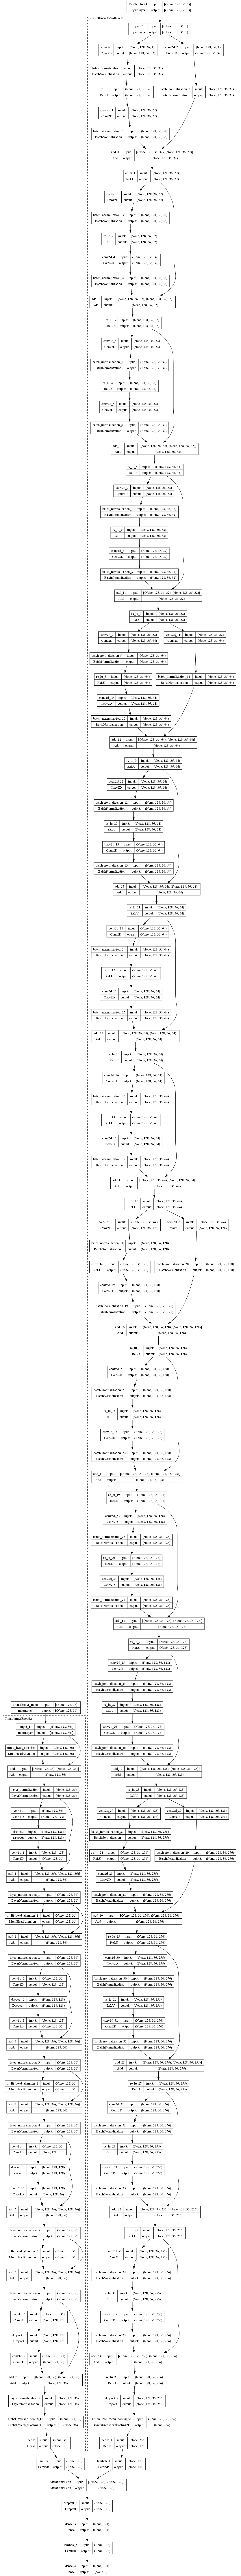

In [37]:
from tensorflow.keras.utils import plot_model

# 모델 시각화
plot_model(
    AF_model,                   # 학습에 사용된 모델
    to_file="model_plot.png",  # 저장할 파일 이름
    show_shapes=True,         # 각 레이어의 출력 텐서 모양 표시
    show_layer_names=True,    # 레이어 이름 표시
    expand_nested=True,       # 중첩된 모델 (서브모델) 시각화
    dpi=96                    # 해상도 설정
)

In [38]:
trainX_transformer.shape

(9080, 128, 36)

In [39]:
trainX_resnet.shape

(9080, 128, 36, 1)

In [40]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.utils import class_weight
from tensorflow.keras.callbacks import LearningRateScheduler

def lr_schedule(epoch, lr):
    if epoch < 5:
        return lr
    return lr * tf.math.exp(-0.05)  # 지수 감소

lr_scheduler = LearningRateScheduler(lr_schedule)

# ReduceLROnPlateau 설정
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # 검증 손실 기준으로 동작
    factor=0.5,          # 학습률 감소 비율 (50% 감소)
    patience = 5,          # 개선되지 않을 경우 5 Epoch 후 학습률 감소
    min_lr=1e-6          # 학습률의 하한선
)

# EarlyStopping 설정
early_stopping = EarlyStopping(
    monitor='val_loss',     # 검증 손실 기준으로 조기 종료
    patience=10,            # 개선되지 않을 경우 10 Epoch 후 종료
    restore_best_weights=True  # 가장 좋은 가중치로 복원
)


# 콜백 리스트
callbacks = [early_stopping, reduce_lr, lr_scheduler]

# 모델 학습
history = AF_model.fit(
    [trainX_transformer, trainX_resnet],  # 입력 데이터
    trainy_one_hot,                       # 레이블
    validation_data=([valX_transformer, valX_resnet],                # 검증 데이터 비율
    valy_one_hot),                 
    epochs=100,                          # 최대 Epoch 수
    batch_size=12,                       # 배치 사이즈
    callbacks=callbacks,                  # 콜백 리스트 추가
)


Epoch 1/100
757/757 [==============================] - 282s 356ms/step - loss: 0.0295 - accuracy: 0.9062 - val_loss: 0.0187 - val_accuracy: 0.9383 - lr: 0.0010
Epoch 2/100
757/757 [==============================] - 267s 352ms/step - loss: 0.0163 - accuracy: 0.9468 - val_loss: 0.0125 - val_accuracy: 0.9621 - lr: 0.0010
Epoch 3/100
757/757 [==============================] - 267s 352ms/step - loss: 0.0110 - accuracy: 0.9674 - val_loss: 0.0068 - val_accuracy: 0.9718 - lr: 0.0010
Epoch 4/100
757/757 [==============================] - 267s 352ms/step - loss: 0.0110 - accuracy: 0.9605 - val_loss: 0.0280 - val_accuracy: 0.8837 - lr: 0.0010
Epoch 5/100
757/757 [==============================] - 267s 352ms/step - loss: 0.0143 - accuracy: 0.9393 - val_loss: 0.0154 - val_accuracy: 0.9352 - lr: 0.0010
Epoch 6/100
757/757 [==============================] - 267s 352ms/step - loss: 0.0091 - accuracy: 0.9621 - val_loss: 0.0074 - val_accuracy: 0.9634 - lr: 9.5123e-04
Epoch 7/100
757/757 [===============

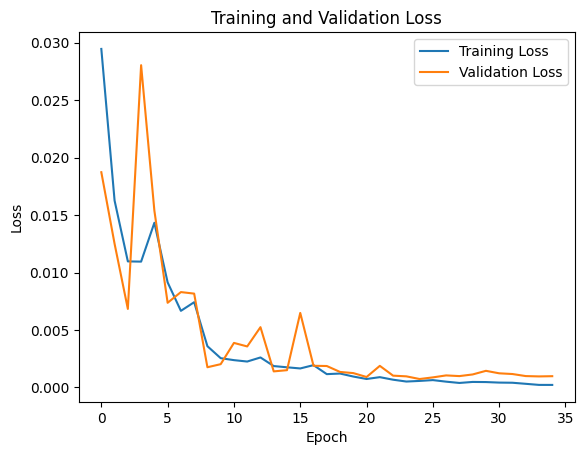

In [41]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

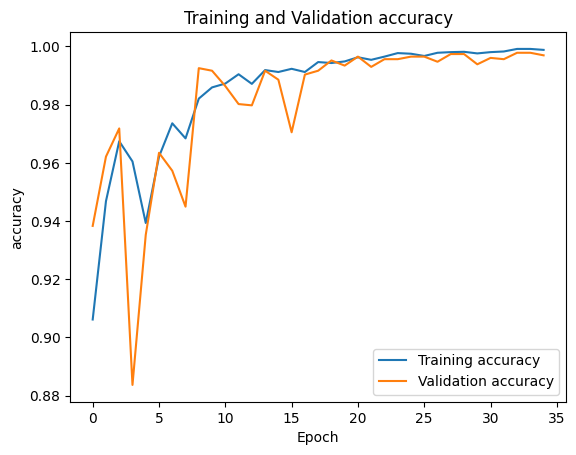

In [42]:
# Plot training and validation loss
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.title('Training and Validation accuracy')
plt.show()

89/89 [==============================] - 30s 332ms/step
Classification Report:
              precision    recall  f1-score   support

       Lying       1.00      1.00      1.00       920
     Sitting       1.00      1.00      1.00       966
    STANDING       0.99      1.00      1.00       952

    accuracy                           1.00      2838
   macro avg       1.00      1.00      1.00      2838
weighted avg       1.00      1.00      1.00      2838

Test Accuracy: 1.00


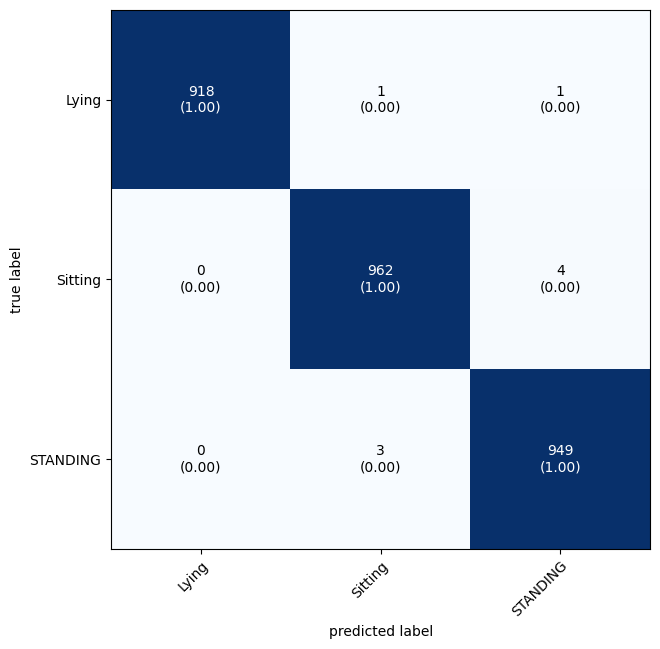

In [43]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np

# 예측 수행
predy = AF_model.predict([testX_transformer, testX_resnet])
predy = np.argmax(predy, axis=-1)  # 가장 확률이 높은 클래스를 선택

# 테스트 라벨 (One-Hot Encoding → 정수형 라벨 변환)
testy = np.argmax(testy_one_hot, axis=-1)  # 테스트 레이블 변환

# 라벨 정의
LABELS = ['Lying', 'Sitting', 'STANDING']

# 혼동 행렬 생성
cm = confusion_matrix(testy, predy)

# 혼동 행렬 시각화
plot_confusion_matrix(conf_mat=cm, class_names=LABELS, show_normed=True, figsize=(7,7))

# 성능 보고서 출력
print("Classification Report:")
print(classification_report(testy, predy, target_names=LABELS))

# 정확도 출력
accuracy = accuracy_score(testy, predy)
print(f"Test Accuracy: {accuracy:.2f}")


In [44]:
from sklearn.metrics import precision_score, recall_score, f1_score

print(cm)
print(accuracy_score(testy,predy))
print(f1_score(testy,predy, average='weighted'))
print(classification_report(testy,predy))

[[918   1   1]
 [  0 962   4]
 [  0   3 949]]
0.9968287526427061
0.9968298481791725
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       920
           1       1.00      1.00      1.00       966
           2       0.99      1.00      1.00       952

    accuracy                           1.00      2838
   macro avg       1.00      1.00      1.00      2838
weighted avg       1.00      1.00      1.00      2838

